In [14]:
import pandas as pd
from scipy import stats


## Exercise 1

In [15]:
# Exercise 1
# Manually create a crosstab dataframe

df = pd.DataFrame()
df["Codeup Student"] = [49, 1]
df["Not Codeup Student"] = [1, 30]
df.index = ["Uses a Macbook", "Doesn't use a Macbook"]
df

,Codeup Student,Not Codeup Student
Uses a Macbook,49,1
Doesn't use a Macbook,1,30


In [16]:
alpha = 0.01

chi2, p, degf, expected = stats.chi2_contingency(df)

In [17]:
null_hypothesis = "using a macbook and being a Codeup student are independent"

if p < alpha:
    print("Reject the null")
    
else:
    print("Fail to reject the null that")
    


Reject the null


## Exercise 2
Choose another 2 categorical variables from the mpg dataset and perform a 
$\chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses

In [18]:
from pydataset import data
mpg = data("mpg")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [19]:
# Here's an example: We know from domain knowledge that model and manufacturer are dependent
# We expect to reject the null hypothesis, based on experience
# So let's test it!

In [20]:
null_hypothesis = "Model and Manufacturer are independent"

In [21]:
observed = pd.crosstab(mpg.manufacturer, mpg.model)
observed

model,4runner 4wd,a4,a4 quattro,a6 quattro,altima,c1500 suburban 2wd,camry,camry solara,caravan 2wd,civic,...,mustang,navigator 2wd,new beetle,passat,pathfinder 4wd,ram 1500 pickup 4wd,range rover,sonata,tiburon,toyota tacoma 4wd
manufacturer,,,,,,,,,,,,,,,,,,,,,
audi,0,7,8,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chevrolet,0,0,0,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dodge,0,0,0,0,0,0,0,0,11,0,...,0,0,0,0,0,10,0,0,0,0
ford,0,0,0,0,0,0,0,0,0,0,...,9,0,0,0,0,0,0,0,0,0
honda,0,0,0,0,0,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
hyundai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,7,0
jeep,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
land rover,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
lincoln,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0


In [22]:
alpha = 0.01

chi2, p, degf, expected = stats.chi2_contingency(df)

In [23]:
if p < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")
p

Reject the null


1.09028085145229e-16

## Exercise 3

Use the data from the employees database to answer these questions:
- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?


In [47]:
from env import get_url
url = get_url("employees")

In [54]:
sql = """
    select dept_name, gender from employees
    join dept_emp using(emp_no)
    join departments using(dept_no)
    where to_date > now()
"""
df = pd.read_sql(sql, url)
df.head()

,dept_name,gender
0,Customer Service,M
1,Customer Service,F
2,Customer Service,M
3,Customer Service,F
4,Customer Service,F


In [55]:
observed = pd.crosstab(df.dept_name, df.gender)
observed

gender,F,M
dept_name,,
Customer Service,7007,10562
Development,24533,36853
Finance,5014,7423
Human Resources,5147,7751
Marketing,5864,8978
Production,21393,31911
Quality Management,5872,8674
Research,6181,9260
Sales,14999,22702


In [57]:
df["in_sales_or_marketing"] = df.dept_name.isin(["Sales", "Marketing"])

In [60]:
observed = pd.crosstab(df.gender, df.in_sales_or_marketing)
observed

in_sales_or_marketing,False,True
gender,,
F,75147,20863
M,112434,31680


In [61]:
alpha = 0.01

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [62]:
if p < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null


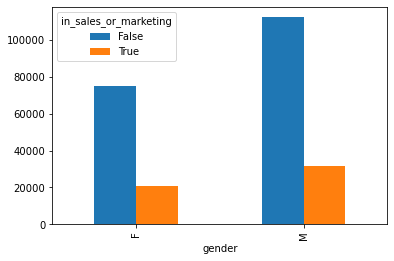

In [63]:
observed.plot.bar()
